# Mapping of registered lightning arroud wind-turbines

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import time
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import statistics
import cartopy.geodesic as cgeo
import json


# Haversine formula for calculating the distance between two points on a sphere
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth's radius in km
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Vectorizing the Haversine formula
vec_haversine = np.vectorize(haversine)


https://overpass-turbo.eu/#

// @name tower

/*
This has been generated by the overpass-turbo wizard.
The original search was:
“ man_made = tower”
*/
[out:json][timeout:25];
// gather results
nwr["man_made"="tower"](48.7022575, 7.0337444,51.5979428, 13.5376508);
// print results
out center;


// @name wind_turbine

/*
This has been generated by the overpass-turbo wizard.
The original search was:
“generator:method=wind_turbine”
*/
[out:json][timeout:25];
// gather results
nwr["generator:source"="wind"](48.7022575, 7.0337444,51.5979428, 13.5376508);
// print results
out center;

In [70]:
json_file = '/home/kakl/vanice/data/windturbine.geojson'

with open(json_file) as f:
    data = json.load(f)
windturbines = pd.json_normalize(data,'features')

windturbines['lon'] = windturbines['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[0])
windturbines['lat'] = windturbines['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[1])


In [71]:
# Reduction of wind-turbines points

windturbines['lonRad']=np.radians(windturbines.lon)
windturbines['latRad']=np.radians(windturbines.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
windturbines['DlonRad']=lonRad-windturbines.lonRad
windturbines['DlatRad']=latRad-windturbines.latRad
windturbines['a']=np.sin(windturbines.DlatRad/2.)**2. + np.cos(windturbines.latRad) * np.cos(latRad) * np.sin(windturbines.DlonRad/2.)**2.
windturbines['km'] = 2. * np.arcsin(np.sqrt(windturbines.a))*6378.
windturbines = windturbines.loc[windturbines['km'] <= BLITZ_DIST]
windturbines.reset_index(inplace=True)

In [9]:
json_file = '/home/kakl/vanice/data/tower.geojson'

with open(json_file) as f:
    data = json.load(f)
towers = pd.json_normalize(data,'features')

towers['lon'] = towers['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[0])
towers['lat'] = towers['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[1])


In [10]:
# Reduction of distant tall structures

towers['lonRad']=np.radians(towers.lon)
towers['latRad']=np.radians(towers.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
towers['DlonRad']=lonRad-towers.lonRad
towers['DlatRad']=latRad-towers.latRad
towers['a']=np.sin(towers.DlatRad/2.)**2. + np.cos(towers.latRad) * np.cos(latRad) * np.sin(towers.DlonRad/2.)**2.
towers['km'] = 2. * np.arcsin(np.sqrt(towers.a))*6378.
towers = towers.loc[towers['km'] <= BLITZ_DIST]


In [12]:
json_file = '/home/kakl/vanice/data/mast.geojson'

with open(json_file) as f:
    data = json.load(f)
masts = pd.json_normalize(data,'features')

masts['lon'] = masts['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[0])
masts['lat'] = masts['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[1])


In [13]:
# Reduction of distant tall structures

masts['lonRad']=np.radians(masts.lon)
masts['latRad']=np.radians(masts.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
masts['DlonRad']=lonRad-masts.lonRad
masts['DlatRad']=latRad-masts.latRad
masts['a']=np.sin(masts.DlatRad/2.)**2. + np.cos(masts.latRad) * np.cos(latRad) * np.sin(masts.DlonRad/2.)**2.
masts['km'] = 2. * np.arcsin(np.sqrt(masts.a))*6378.
masts = masts.loc[masts['km'] <= BLITZ_DIST]


In [15]:
json_file = '/home/kakl/vanice/data/chimney.geojson'

with open(json_file) as f:
    data = json.load(f)
chimneys = pd.json_normalize(data,'features')

chimneys['lon'] = chimneys['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[0])
chimneys['lat'] = chimneys['geometry.coordinates'].apply(lambda x: x[0][0] if isinstance(x[0], (list, np.ndarray)) else x).apply(lambda x: x[1])


In [16]:
# Reduction of distant tall structures

chimneys['lonRad']=np.radians(chimneys.lon)
chimneys['latRad']=np.radians(chimneys.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
chimneys['DlonRad']=lonRad-chimneys.lonRad
chimneys['DlatRad']=latRad-chimneys.latRad
chimneys['a']=np.sin(chimneys.DlatRad/2.)**2. + np.cos(chimneys.latRad) * np.cos(latRad) * np.sin(chimneys.DlonRad/2.)**2.
chimneys['km'] = 2. * np.arcsin(np.sqrt(chimneys.a))*6378.
chimneys = chimneys.loc[chimneys['km'] <= BLITZ_DIST]


In [ ]:
#lat=51.7656581
#lon=10.6106400
#start=pd.Timestamp('2023-02-01 12:00') # Winter s dirou
#end=pd.Timestamp('2023-02-02 2:00')

lat=50.1006197
lon=10.7797819


start=pd.Timestamp('2023-11-8 2:00') # Only one stroke
end=pd.Timestamp('2023-11-8 3:00')

#start=pd.Timestamp('2023-6-5 13:00') 
#end=pd.Timestamp('2023-6-5 18:00')

# Please comment not relevant time intervals
start=pd.Timestamp('2023-01-13 12:00') # Winter
end=pd.Timestamp('2023-01-13 14:00')

#start=pd.Timestamp('2023-02-01 20:00') # Winter
#end=pd.Timestamp('2023-02-02 2:00')

#start=pd.Timestamp('2023-02-25 08:00') # Winter
#end=pd.Timestamp('2023-02-25 15:00')

#start=pd.Timestamp('2023-03-10 10:00') # Winter
#end=pd.Timestamp('2023-03-10 22:00')

#start=pd.Timestamp('2023-03-13 15:00') # Winter
#end=pd.Timestamp('2023-03-13 22:00')

#start=pd.Timestamp('2023-03-30 11:00') # Winter
#end=pd.Timestamp('2023-03-30 19:00')

start=pd.Timestamp('2023-03-30') 
end=pd.Timestamp('2023-03-30 19:00')

#start=pd.Timestamp('2023-6-8 2:00') 
#end=pd.Timestamp('2023-6-8 20:00')

start=pd.Timestamp('2023-11-24 07:00') # Winter
end=pd.Timestamp('2023-11-24 18:00')

#start=pd.Timestamp('2023-12-21 17:00') # Winter
#end=pd.Timestamp('2023-12-21 23:00')

#start=pd.Timestamp('2023-12-22 19:00') # Winter
#end=pd.Timestamp('2023-12-22 23:50')


sitename = str(start)
radius_error = 1.4
#radius_error = 5.6

BLITZ_DIST = 150


In [30]:
ble
# Generate random lightning
# set random azimuth angles (seed for reproducablity)
npoints = 10000
np.random.seed(1235)
rand_azimuths_deg = np.random.random(npoints)*360

# set random distances (seed for reproducablity)
np.random.seed(6341)
rand_distances = BLITZ_DIST*1000*np.sqrt((np.random.random(npoints))) # np.random.uniform(low=0, high=radius, size=npoints)

blitz = pd.DataFrame(columns=['lat', 'lon'])
blitz.lon = cgeo.Geodesic().direct((lon,lat),rand_azimuths_deg,rand_distances)[:,0]
blitz.lat = cgeo.Geodesic().direct((lon,lat),rand_azimuths_deg,rand_distances)[:,1]


In [67]:
# Load of lightning data

blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+str(start).split(' ')[0]+'.log', sep=',', low_memory=False, on_bad_lines='skip')


In [68]:
# Reduction of distant lightnings

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
blitz.reset_index(inplace=True)

In [72]:
# Identify lightning with nearby structures

# Converting coordinates to radians
blitz['latRad'] = np.radians(blitz['lat'])
blitz['lonRad'] = np.radians(blitz['lon'])
windturbines['latRad'] = np.radians(windturbines['lat'])
windturbines['lonRad'] = np.radians(windturbines['lon'])

# Converting pandas.Series to numpy.array
latRad_blitz = blitz['latRad'].to_numpy()
lonRad_blitz = blitz['lonRad'].to_numpy()
latRad_windturbines = windturbines['latRad'].to_numpy()
lonRad_windturbines = windturbines['lonRad'].to_numpy()

# Calculating distance between each point in 'blitz' and all points in 'structures'
distances_wt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_windturbines, lonRad_windturbines)
#distances_wt2 = vec_haversine(latRad_windturbines[:, np.newaxis], lonRad_windturbines[:, np.newaxis], latRad_blitz, lonRad_blitz)

# Marking points in 'blitz' that are within 1.4 km of any point in 'structures'
#blitz['is_close'] = False
#blitz['is_close'] = np.any(distances_wt <= (radius_error), axis=1)
#windturbines['is_close'] = np.any(distances_wt2 <= (radius_error), axis=1)
#vetrniky = len(blitz.loc[blitz['is_close']==True])
#blitz['vetrnik'] = blitz['is_close']

In [82]:
# Identify lightning with nearby structures

# Converting coordinates to radians
blitz['latRad'] = np.radians(blitz['lat'])
blitz['lonRad'] = np.radians(blitz['lon'])
towers['latRad'] = np.radians(towers['lat'])
towers['lonRad'] = np.radians(towers['lon'])

# Converting pandas.Series to numpy.array
latRad_blitz = blitz['latRad'].to_numpy()
lonRad_blitz = blitz['lonRad'].to_numpy()
latRad_towers = towers['latRad'].to_numpy()
lonRad_towers = towers['lonRad'].to_numpy()

# Calculating distance between each point in 'blitz' and all points in 'structures'
distances_tw = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_towers, lonRad_towers)

# Marking points in 'blitz' that are within 1.4 km of any point in 'structures'
#blitz['is_close'] = False
#blitz['is_close'] = np.any(distances_tw <= (radius_error), axis=1)
#veze = len(blitz.loc[blitz['is_close']==True])
#blitz['both'] = blitz['vetrnik'] | blitz['is_close']

In [83]:
# Identify lightning with nearby structures

# Converting coordinates to radians
blitz['latRad'] = np.radians(blitz['lat'])
blitz['lonRad'] = np.radians(blitz['lon'])
masts['latRad'] = np.radians(masts['lat'])
masts['lonRad'] = np.radians(masts['lon'])

# Converting pandas.Series to numpy.array
latRad_blitz = blitz['latRad'].to_numpy()
lonRad_blitz = blitz['lonRad'].to_numpy()
latRad_masts = masts['latRad'].to_numpy()
lonRad_masts = masts['lonRad'].to_numpy()

# Calculating distance between each point in 'blitz' and all points in 'structures'
distances_mt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_masts, lonRad_masts)

# Marking points in 'blitz' that are within 1.4 km of any point in 'structures'
#blitz['is_close'] = False
#blitz['is_close'] = np.any(distances_mt <= (radius_error), axis=1)
#stozary = len(blitz.loc[blitz['is_close']==True])

In [84]:
# Identify lightning with nearby structures

# Converting coordinates to radians
blitz['latRad'] = np.radians(blitz['lat'])
blitz['lonRad'] = np.radians(blitz['lon'])
chimneys['latRad'] = np.radians(chimneys['lat'])
chimneys['lonRad'] = np.radians(chimneys['lon'])

# Converting pandas.Series to numpy.array
latRad_blitz = blitz['latRad'].to_numpy()
lonRad_blitz = blitz['lonRad'].to_numpy()
latRad_chimneys = chimneys['latRad'].to_numpy()
lonRad_chimneys = chimneys['lonRad'].to_numpy()

# Calculating distance between each point in 'blitz' and all points in 'structures'
distances_ch = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_chimneys, lonRad_chimneys)

# Marking points in 'blitz' that are within 1.4 km of any point in 'structures'
#blitz['is_close'] = False
#blitz['is_close'] = np.any(distances_ch <= (radius_error), axis=1)
#kominy = len(blitz.loc[blitz['is_close']==True])


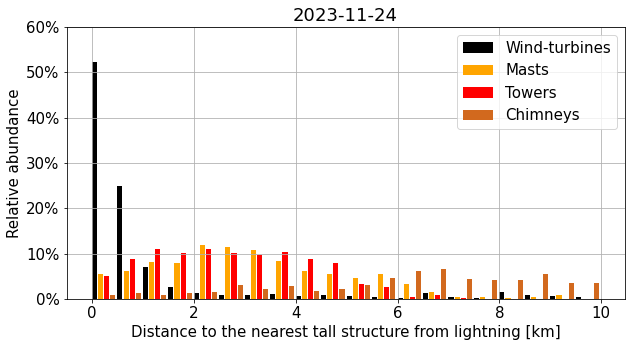

In [85]:
celkem = len(blitz)

#plt.figure(figsize=(10,5), facecolor='lightyellow')
plt.figure(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 15})
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1))

BINS = 20

#plt.hist(np.amin(distances_wt,axis=1), bins=50)
#plt.hist((np.amin(distances_wt, axis=1),np.amin(distances_mt, axis=1),np.amin(distances_tw, axis=1)),color=('orange','purple','red'),edgecolor='white',label=('wind-turbines','masts','towers'),bins=np.linspace(0, 10, 40))
hh1 = np.histogram(np.amin(distances_wt, axis=1), bins= np.linspace(0, 10, BINS+1))
hh2 = np.histogram(np.amin(distances_mt, axis=1), bins= np.linspace(0, 10, BINS+1))
hh3 = np.histogram(np.amin(distances_tw, axis=1), bins= np.linspace(0, 10, BINS+1))
hh4 = np.histogram(np.amin(distances_ch, axis=1), bins= np.linspace(0, 10, BINS+1))
#plt.hist((np.amin(distances_wt, axis=1),np.amin(distances_mt, axis=1),np.amin(distances_tw, axis=1)),color=('black','orange','red'),edgecolor='white',label=('wind-turbines','masts','towers'),bins=np.linspace(0, 10, 40),density=True)
plt.ylim(0,0.6)
plt.bar(hh1[1][:-1]+0.05,hh1[0]/celkem, width=0.1, label='Wind-turbines', color='black')
plt.bar(hh2[1][:-1]+0.05+0.12,hh2[0]/celkem, width=0.1, label='Masts', color='orange')
plt.bar(hh3[1][:-1]+0.05+2*0.12,hh3[0]/celkem, width=0.1, label='Towers', color='red')
plt.bar(hh4[1][:-1]+0.05+3*0.12,hh4[0]/celkem, width=0.1, label='Chimneys', color='chocolate')
plt.legend()
plt.xlabel('Distance to the nearest tall structure from lightning [km]')
plt.ylabel('Relative abundance')
plt.title(sitename.split()[0])
plt.grid()

In [65]:
ble
print(celkem)
rhh1 = hh1
rhh2 = hh2
rhh3 = hh3
rhh4 = hh4

rhh1 = (rhh1[0]/celkem, rhh1[1])
rhh2 = (rhh2[0]/celkem, rhh2[1])
rhh3 = (rhh3[0]/celkem, rhh3[1])
rhh4 = (rhh4[0]/celkem, rhh4[1])


9994


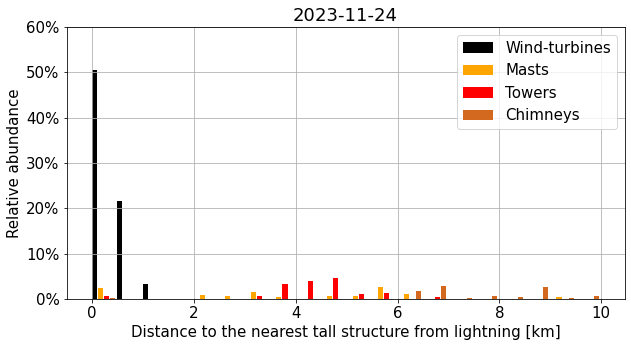

In [86]:
celkem = len(blitz)

#plt.figure(figsize=(10,5), facecolor='lightyellow')
plt.figure(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 15})
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1))

BINS = 20

#plt.hist(np.amin(distances_wt,axis=1), bins=50)
#plt.hist((np.amin(distances_wt, axis=1),np.amin(distances_mt, axis=1),np.amin(distances_tw, axis=1)),color=('orange','purple','red'),edgecolor='white',label=('wind-turbines','masts','towers'),bins=np.linspace(0, 10, 40))
hh1 = np.histogram(np.amin(distances_wt, axis=1), bins= np.linspace(0, 10, BINS+1))
hh2 = np.histogram(np.amin(distances_mt, axis=1), bins= np.linspace(0, 10, BINS+1))
hh3 = np.histogram(np.amin(distances_tw, axis=1), bins= np.linspace(0, 10, BINS+1))
hh4 = np.histogram(np.amin(distances_ch, axis=1), bins= np.linspace(0, 10, BINS+1))
#plt.hist((np.amin(distances_wt, axis=1),np.amin(distances_mt, axis=1),np.amin(distances_tw, axis=1)),color=('black','orange','red'),edgecolor='white',label=('wind-turbines','masts','towers'),bins=np.linspace(0, 10, 40),density=True)
plt.ylim(0,0.6)
plt.bar(hh1[1][:-1]+0.05,hh1[0]/celkem - rhh1[0], width=0.1, label='Wind-turbines', color='black')
plt.bar(hh2[1][:-1]+0.05+0.12,hh2[0]/celkem - rhh2[0], width=0.1, label='Masts', color='orange')
plt.bar(hh3[1][:-1]+0.05+2*0.12,hh3[0]/celkem - rhh3[0], width=0.1, label='Towers', color='red')
plt.bar(hh4[1][:-1]+0.05+3*0.12,hh4[0]/celkem - rhh4[0], width=0.1, label='Chimneys', color='chocolate')
plt.legend()
plt.xlabel('Distance to the nearest tall structure from lightning [km]')
plt.ylabel('Relative abundance')
plt.title(sitename.split()[0])
plt.grid()

In [87]:
#bez = len(blitz.loc[blitz['both']==False])
print(start, '-', end)
median_wt = round(statistics.median(np.amin(distances_wt, axis=1)),1)
median_tw = round(statistics.median(np.amin(distances_tw, axis=1)),1)
median_mt = round(statistics.median(np.amin(distances_mt, axis=1)),1)
median_ch = round(statistics.median(np.amin(distances_ch, axis=1)),1)
mean_wt = round(statistics.mean(np.amin(distances_wt, axis=1)),1)
mean_tw = round(statistics.mean(np.amin(distances_tw, axis=1)),1)
mean_mt = round(statistics.mean(np.amin(distances_mt, axis=1)),1)
mean_ch = round(statistics.mean(np.amin(distances_ch, axis=1)),1)

#print('Nothing found\t', bez, '\t', round(bez/(celkem/100),0),"%")

print()
print('Storm date\tStrokes\t\tMedian/Mean of distance to neares tall structure')
print('\t\t\t\tWind-turbines\tTowers\t\tMasts\t\tChimneys')
print(sitename.split()[0],'\t',celkem,'\t\t', median_wt,'/', mean_wt,'\t', median_tw,'/', mean_tw,'\t', median_mt,'/', mean_mt,'\t', median_ch,'/', mean_ch)

#print()
#print('Storm date\tStrokes\t\tStrokes/percent of tall structures up to 1.4 km')
#print('\t\t\t\tWind-turbines\tTowers\t\tMasts\t\tChimneys')
#print(sitename.split()[0],'\t',celkem,'\t\t', vetrniky,'/', round(vetrniky/(celkem/100),0),'%\t', veze,'/', round(veze/(celkem/100),0),'%\t', stozary,'/',round(stozary/(celkem/100),0),'%\t', kominy,'/', round(kominy/(celkem/100),0),'%')


2023-11-24 07:00:00 - 2023-11-24 18:00:00

Storm date	Strokes		Median/Mean of distance to neares tall structure
				Wind-turbines	Towers		Masts		Chimneys
2023-11-24 	 906 		 0.5 / 1.4 	 2.7 / 2.8 	 3.0 / 3.3 	 8.4 / 8.9


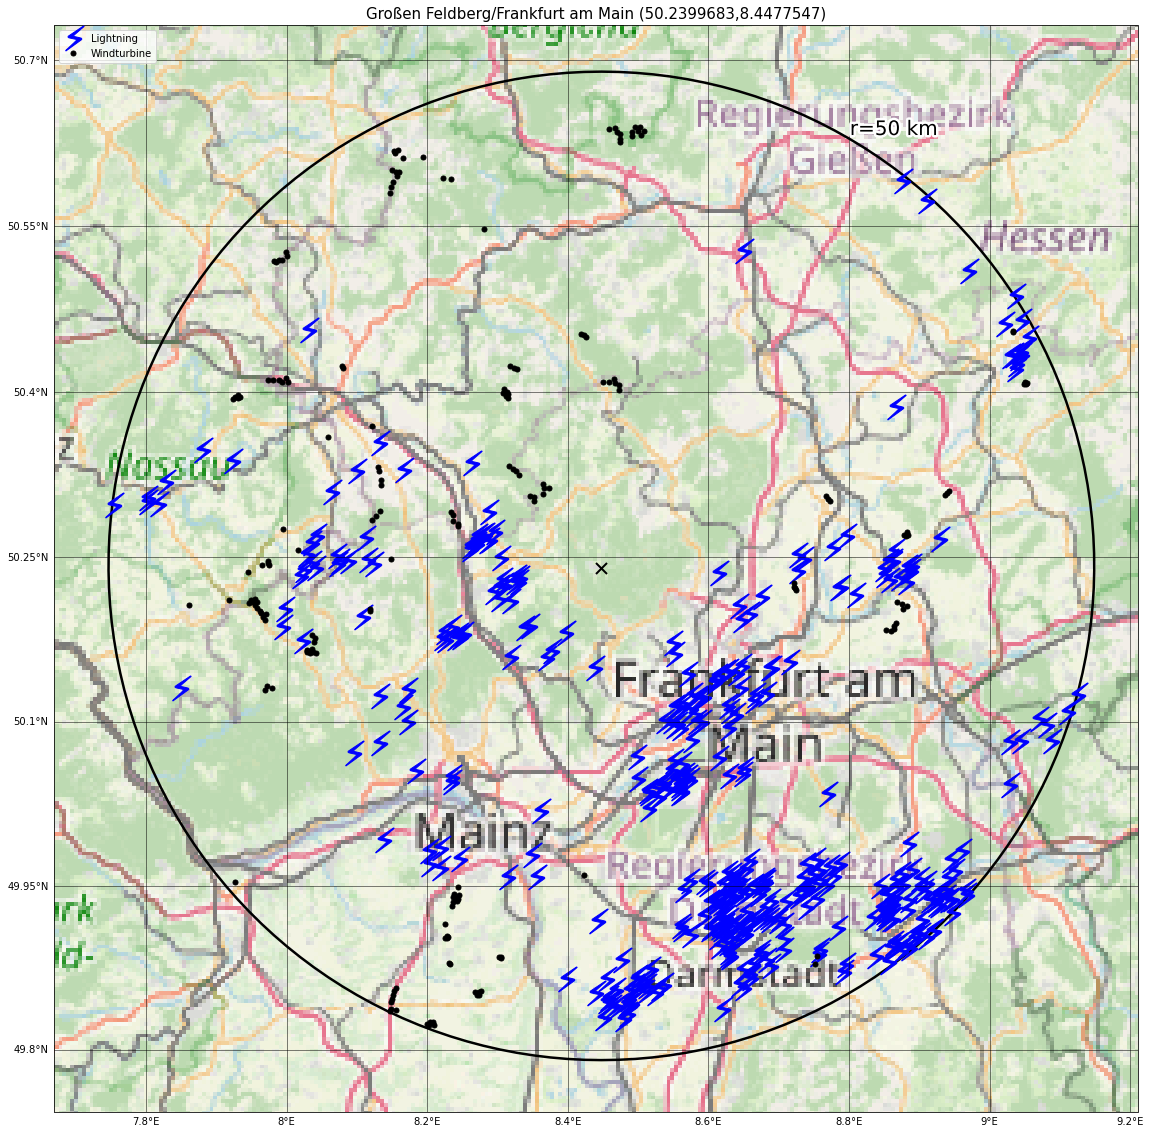

FileNotFoundError: [Errno 2] No such file or directory: './pics/Großen Feldberg/Frankfurt am Main_windturbines.png'

In [73]:
__title__   = 'Plot OpenStreetMap site map'
__version__ = 'v1.0 (2021-03-02)'
__author__  = 'Mathew Lipson'
__email__   = 'm.lipson@unsw.edu.au'

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import cartopy
import cartopy.geodesic as cgeo
import cartopy.crs as ccrs

import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
import shapely

projpath = '.'

##########################################################################

def main():

    RADIUS = BLITZ_DIST * 1000
    
    # style can be 'map' or 'satellite'

    #for style in ['map','satellite']:

    osm_image(lon, lat, sitename=sitename, style='map', radius=RADIUS)

    return

##########################################################################

def osm_image(lon,lat,sitename='Columbo',style='satellite',radius=500):
    '''This function makes OpenStreetMap satellite or map image with circle and random points.
    Change np.random.seed() number to produce different (reproducable) random patterns of points.
    Also review 'scale' variable'''

    if style=='map':
        ## MAP STYLE
        cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.OSM() # spoofed, downloaded street map
    elif style =='satellite':
        # SATELLITE STYLE
        cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.QuadtreeTiles() # spoofed, downloaded street map
    else:
        print('no valid style')

    stroke = [pe.Stroke(linewidth=1, foreground='w'), pe.Normal()]

    ############################################################################

    plt.close('all')
    fig = plt.figure(figsize=(20,20)) # open matplotlib figure
    ax = plt.axes(projection=img.crs) # project using coordinate reference system (CRS) of street map
    data_crs = ccrs.PlateCarree()

    ax.set_title(f'{sitename} ({lat},{lon})',fontsize=15)

    # auto-calculate scale
    #scale = int(120/np.log(radius))
    scale = int(115/np.log(radius))
    scale = (scale<20) and scale or 19

    scale = 8
    
    # or change scale manually
    # NOTE: scale specifications should be selected based on radius
    # but be careful not have both large scale (>16) and large radius (>1000), 
    #  it is forbidden under [OSM policies](https://operations.osmfoundation.org/policies/tiles/)
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    extent = calc_extent(lon,lat,radius*1.1)
    ax.set_extent(extent) # set extents
    ax.add_image(img, int(scale)) # add OSM with zoom specification

    # add site
    ax.plot(lon,lat, color='black', marker='x', ms=11, mew=2, transform=data_crs)
    
    lightning = blitz
    ax.plot(lightning.lon,lightning.lat,color='blue',lw=0,marker='$\u26A1$',ms=25,mew=1.0,transform=data_crs, label='Lightning')

    ax.plot(windturbines.lon,windturbines.lat,color='black',lw=0,marker='o',ms=5,mew=1.0,transform=data_crs, label='Windturbine')

    # add cartopy geodesic circle
    circle_points = cgeo.Geodesic().circle(lon=lon, lat=lat, radius=radius)
    geom = shapely.geometry.Polygon(circle_points)
    ax.add_geometries((geom,), crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=2.5)

    radius_text = cgeo.Geodesic().direct(points=(lon,lat),azimuths=30,distances=radius)[:,0:2][0]
    stroke = [pe.Stroke(linewidth=5, foreground='w'), pe.Normal()]
    ax.text(radius_text[0],radius_text[1],f'r={int(radius/1000)} km', color='black', 
        fontsize=20, ha='left',va='bottom', path_effects=stroke, transform=data_crs)

    gl = ax.gridlines(draw_labels=True, crs=data_crs,
                        color='k',lw=0.5)

    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    
    plt.legend(loc=2)

    plt.show()

    fig.savefig(f'./pics/'+sitename+'_windturbines.png', dpi=150, bbox_inches='tight')

    return

def calc_extent(lon,lat,dist):
    '''This function calculates extent of map
    Inputs:
        lat,lon: location in degrees
        dist: dist to edge from centre
    '''

    dist_cnr = np.sqrt(2*dist**2)
    top_left = cgeo.Geodesic().direct(points=(lon,lat),azimuths=-45,distances=dist_cnr)[:,0:2][0]
    bot_right = cgeo.Geodesic().direct(points=(lon,lat),azimuths=135,distances=dist_cnr)[:,0:2][0]

    extent = [top_left[0], bot_right[0], bot_right[1], top_left[1]]

    return extent

def image_spoof(self, tile):
    '''this function reformats web requests from OSM for cartopy
    Heavily based on code by Joshua Hrisko at:
        https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy'''

    url = self._image_url(tile)                # get the url of the street map API
    req = Request(url)                         # start request
    req.add_header('User-agent','Anaconda 3')  # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read())            # get image
    fh.close()                                 # close url
    img = Image.open(im_data)                  # open image with PIL
    img = img.convert(self.desired_tile_form)  # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

if __name__ == "__main__":

   main()

In [134]:
start=pd.Timestamp('2023-5-1') # Winter

medians = pd.DataFrame(columns=['day', 'median'])

for d in range(0,360-120):
    day = start + pd.Timedelta(days=d)
    ifile = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+ifile, sep=',', low_memory=False, on_bad_lines='skip')
    print(ifile)

    # Reduction of distant lightnings
    blitz['lonRad']=np.radians(blitz.lon)
    blitz['latRad']=np.radians(blitz.lat)
    lonRad=np.radians(lon)
    latRad=np.radians(lat)
    blitz['DlonRad']=lonRad-blitz.lonRad
    blitz['DlatRad']=latRad-blitz.latRad
    blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
    blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
    blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
    blitz.reset_index(inplace=True)

    if len(blitz)>0:
        # Identify lightning with nearby structures

        # Converting coordinates to radians
        blitz['latRad'] = np.radians(blitz['lat'])
        blitz['lonRad'] = np.radians(blitz['lon'])
        #windturbines['latRad'] = np.radians(windturbines['lat'])
        #windturbines['lonRad'] = np.radians(windturbines['lon'])

        # Converting pandas.Series to numpy.array
        latRad_blitz = blitz['latRad'].to_numpy()
        lonRad_blitz = blitz['lonRad'].to_numpy()
        #latRad_windturbines = windturbines['latRad'].to_numpy()
        #lonRad_windturbines = windturbines['lonRad'].to_numpy()

        # Calculating distance between each point in 'blitz' and all points in 'structures'
        distances_wt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_windturbines, lonRad_windturbines)

        median_wt = round(statistics.median(np.amin(distances_wt, axis=1)),1)
    else:
        median_wt = np.nan
    print(len(blitz), median_wt)
    median = pd.DataFrame(data= {'day':[day],'median':[median_wt]})
    medians = pd.concat([medians,median])
    

2023-05-01.log
0 nan
2023-05-02.log
581 5.2
2023-05-03.log
0 nan
2023-05-04.log
0 nan
2023-05-05.log
3286 5.5
2023-05-06.log
0 nan
2023-05-07.log
595 4.8
2023-05-08.log
0 nan
2023-05-09.log
0 nan
2023-05-10.log
193 5.7
2023-05-11.log
4 4.7
2023-05-12.log
0 nan
2023-05-13.log
26 3.6
2023-05-14.log
87 6.0
2023-05-15.log
221 5.9
2023-05-16.log
27 9.7
2023-05-17.log
0 nan
2023-05-18.log
0 nan
2023-05-19.log
0 nan
2023-05-20.log
0 nan
2023-05-21.log
13 3.7
2023-05-22.log
5461 5.8
2023-05-23.log
57 3.1
2023-05-24.log
0 nan
2023-05-25.log
0 nan
2023-05-26.log
0 nan
2023-05-27.log
0 nan
2023-05-28.log
0 nan
2023-05-29.log
0 nan
2023-05-30.log
0 nan
2023-05-31.log
0 nan
2023-06-01.log
0 nan
2023-06-02.log
0 nan
2023-06-03.log
0 nan
2023-06-04.log
0 nan
2023-06-05.log
809 3.8
2023-06-06.log
0 nan
2023-06-07.log
1359 6.4
2023-06-08.log
8502 4.7
2023-06-09.log
49 3.1
2023-06-10.log
344 5.0
2023-06-11.log
0 nan
2023-06-12.log
0 nan
2023-06-13.log
0 nan
2023-06-14.log
0 nan
2023-06-15.log
83 5.0
202

In [152]:
distances_wt.shape
#windturbines.shape

(51, 3293)

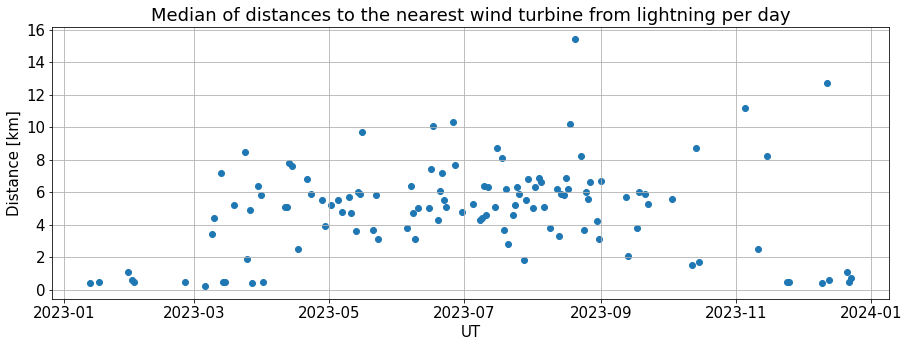

In [147]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.scatter(medians['day'],medians['median'])
plt.ylabel('Distance [km]')
plt.xlabel('UT')
plt.title('Median of distances to the nearest wind turbine from lightning per day')
plt.grid()

In [143]:
#mm = medians
#medians = pd.concat([mm, medians])
statistics.median(np.amin(distances_wt, axis=1))
np.amin(distances_wt, axis=1)


array([0.11760122, 0.23570046, 0.44453479, 0.17739235, 0.5504175 ,
       0.34826543, 1.6021578 , 1.12270533, 0.24428761, 0.73964882,
       1.32770239, 0.35334838, 0.14781746, 0.56598314, 0.45743795,
       0.81754342, 1.89565755, 1.02063632, 0.57613956, 1.36609617,
       0.70393017, 0.07093538, 0.9113773 , 0.12788093, 0.55017576,
       0.48933307, 3.51760142, 3.43253684, 0.64599654, 0.50970097,
       0.06789623, 0.84714094, 2.2984753 , 0.7101398 , 0.03104713,
       0.41933353, 0.27955697, 0.31784739, 1.15880902, 7.37328772,
       1.09916915, 2.15056673, 2.44572422, 2.60275639, 0.70317972,
       0.25552521, 2.25406841, 0.67639342, 0.83285355, 0.34382855,
       1.28445145])

In [178]:
ble
start=pd.Timestamp('2023-1-1') 

for d in range(0,365):
    day = start + pd.Timedelta(days=d)
    file = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+file, sep=',', low_memory=False, on_bad_lines='skip')
    print(file)

    # Reduction of distant lightnings
    blitz['lonRad']=np.radians(blitz.lon)
    blitz['latRad']=np.radians(blitz.lat)
    lonRad=np.radians(lon)
    latRad=np.radians(lat)
    blitz['DlonRad']=lonRad-blitz.lonRad
    blitz['DlatRad']=latRad-blitz.latRad
    blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
    blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
    blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
    blitz.reset_index(inplace=True)

    if len(blitz)>0:
        # Identify lightning with nearby structures

        # Converting coordinates to radians
        blitz['latRad'] = np.radians(blitz['lat'])
        blitz['lonRad'] = np.radians(blitz['lon'])

        # Converting pandas.Series to numpy.array
        latRad_blitz = blitz['latRad'].to_numpy()
        lonRad_blitz = blitz['lonRad'].to_numpy()

        # Calculating distance between each point in 'blitz' and all points in 'structures'
        distances_wt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_windturbines, lonRad_windturbines)
        blitz['wt'] = np.amin(distances_wt, axis=1)
        distances_tw = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_towers, lonRad_towers)
        blitz['tw'] = np.amin(distances_tw, axis=1)
        distances_mt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_masts, lonRad_masts)
        blitz['mt'] = np.amin(distances_mt, axis=1)
        distances_ch = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_chimneys, lonRad_chimneys)
        blitz['ch'] = np.amin(distances_ch, axis=1)
        
        blitz.to_csv('./statistics/'+file, sep=',')
        
print('*************end')    

2023-01-01.log
2023-01-02.log
2023-01-03.log
2023-01-04.log
2023-01-05.log
2023-01-06.log
2023-01-07.log
2023-01-08.log
2023-01-09.log
2023-01-10.log
2023-01-11.log
2023-01-12.log
2023-01-13.log
2023-01-14.log
2023-01-15.log
2023-01-16.log
2023-01-17.log
2023-01-18.log
2023-01-19.log
2023-01-20.log
2023-01-21.log
2023-01-22.log
2023-01-23.log
2023-01-24.log
2023-01-25.log
2023-01-26.log
2023-01-27.log
2023-01-28.log
2023-01-29.log
2023-01-30.log
2023-01-31.log
2023-02-01.log
2023-02-02.log
2023-02-03.log
2023-02-04.log
2023-02-05.log
2023-02-06.log
2023-02-07.log
2023-02-08.log
2023-02-09.log
2023-02-10.log
2023-02-11.log
2023-02-12.log
2023-02-13.log
2023-02-14.log
2023-02-15.log
2023-02-16.log
2023-02-17.log
2023-02-18.log
2023-02-19.log
2023-02-20.log
2023-02-21.log
2023-02-22.log
2023-02-23.log
2023-02-24.log
2023-02-25.log
2023-02-26.log
2023-02-27.log
2023-02-28.log
2023-03-01.log
2023-03-02.log
2023-03-03.log
2023-03-04.log
2023-03-05.log
2023-03-06.log
2023-03-07.log
2023-03-08

In [179]:
start=pd.Timestamp('2023-08-26') 

for d in range(0,4):
    day = start + pd.Timedelta(days=d)
    file = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    try:
        blitz = pd.read_csv('./statistics/'+file, sep=',', low_memory=False, on_bad_lines='skip')
        print(file)
    
        median_wt = round(statistics.median(blitz['wt']),1)
        median_tw = round(statistics.median(blitz['tw']),1)
        median_mt = round(statistics.median(blitz['mt']),1)
        median_ch = round(statistics.median(blitz['ch']),1)
        print(len(blitz), median_wt, median_tw, median_mt, median_ch)
    except:
        pass

print('*************end')


2023-08-26.log
1473 5.6 2.1 2.7 6.8
2023-08-27.log
236 6.6 2.0 2.5 6.5
*************end


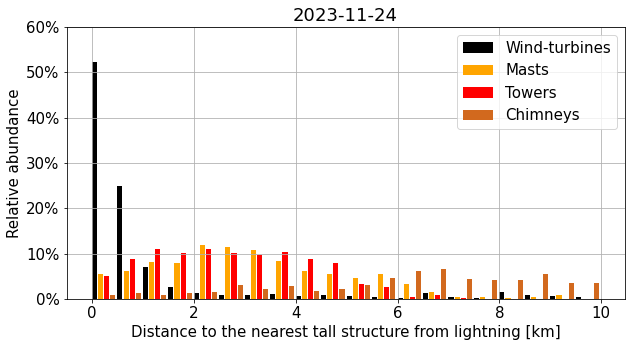

In [177]:
celkem = len(blitz)

#plt.figure(figsize=(10,5), facecolor='lightyellow')
plt.figure(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 15})
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1))

BINS = 20

hh1 = np.histogram(blitz['wt'], bins= np.linspace(0, 10, BINS+1))
hh2 = np.histogram(blitz['mt'], bins= np.linspace(0, 10, BINS+1))
hh3 = np.histogram(blitz['tw'], bins= np.linspace(0, 10, BINS+1))
hh4 = np.histogram(blitz['ch'], bins= np.linspace(0, 10, BINS+1))


plt.ylim(0,0.6)
plt.bar(hh1[1][:-1]+0.05,hh1[0]/celkem, width=0.1, label='Wind-turbines', color='black')
plt.bar(hh2[1][:-1]+0.05+0.12,hh2[0]/celkem, width=0.1, label='Masts', color='orange')
plt.bar(hh3[1][:-1]+0.05+2*0.12,hh3[0]/celkem, width=0.1, label='Towers', color='red')
plt.bar(hh4[1][:-1]+0.05+3*0.12,hh4[0]/celkem, width=0.1, label='Chimneys', color='chocolate')
plt.legend()
plt.xlabel('Distance to the nearest tall structure from lightning [km]')
plt.ylabel('Relative abundance')
plt.title(sitename.split()[0])
plt.grid()

In [257]:
start=pd.Timestamp('2023-1-1') 

medians_wt = pd.DataFrame(columns=['day', 'median'])
medians_tw = pd.DataFrame(columns=['day', 'median'])
medians_mt = pd.DataFrame(columns=['day', 'median'])
medians_ch = pd.DataFrame(columns=['day', 'median'])

for d in range(0,365):
    day = start + pd.Timedelta(days=d)
    file = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    try:
        blitz = pd.read_csv('./statistics/'+file, sep=',', low_memory=False, on_bad_lines='skip')
        #print(file)
    
        median_wt = round(statistics.median(blitz['wt']),1)
        #percentile_wt = round(np.percentile(blitz['wt'],25),1)
        median_tw = round(statistics.median(blitz['tw']),1)
        median_mt = round(statistics.median(blitz['mt']),1)
        median_ch = round(statistics.median(blitz['ch']),1)
        #print(len(blitz), median_wt, median_tw, median_mt, median_ch)
    except:
        median_wt = np.nan
        percentile_wt = np.nan
        median_tw = np.nan
        median_mt = np.nan
        median_ch = np.nan

    median = pd.DataFrame(data= {'day':[day],'median':[median_wt]})
    medians_wt = pd.concat([medians_wt,median])
    median = pd.DataFrame(data= {'day':[day],'median':[median_tw]})
    medians_tw = pd.concat([medians_tw,median])
    median = pd.DataFrame(data= {'day':[day],'median':[median_mt]})
    medians_mt = pd.concat([medians_mt,median])
    median = pd.DataFrame(data= {'day':[day],'median':[median_ch]})
    medians_ch = pd.concat([medians_ch,median])
    #median = pd.DataFrame(data= {'day':[day],'median':[percentile_wt]})
    #medians_wt = pd.concat([medians_wt,median])
print('end')

end


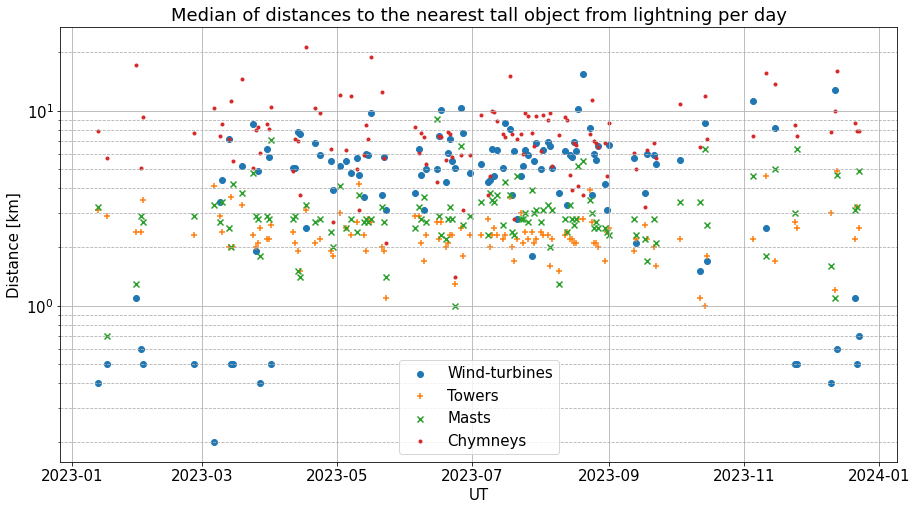

In [226]:
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 15})
plt.scatter(medians_wt['day'],medians_wt['median'], marker='o', label='Wind-turbines')
plt.scatter(medians_tw['day'],medians_tw['median'], marker='+', label='Towers')
plt.scatter(medians_mt['day'],medians_mt['median'], marker='x', label='Masts')
plt.scatter(medians_ch['day'],medians_ch['median'], marker='.', label='Chymneys')
plt.ylabel('Distance [km]')
plt.xlabel('UT')
plt.title('Median of distances to the nearest tall object from lightning per day')
plt.legend(loc=8)
plt.yscale('log')
#plt.ylim(0,20)
#plt.axes().yaxis.set_tick_params(which='minor', right = 'off')

plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

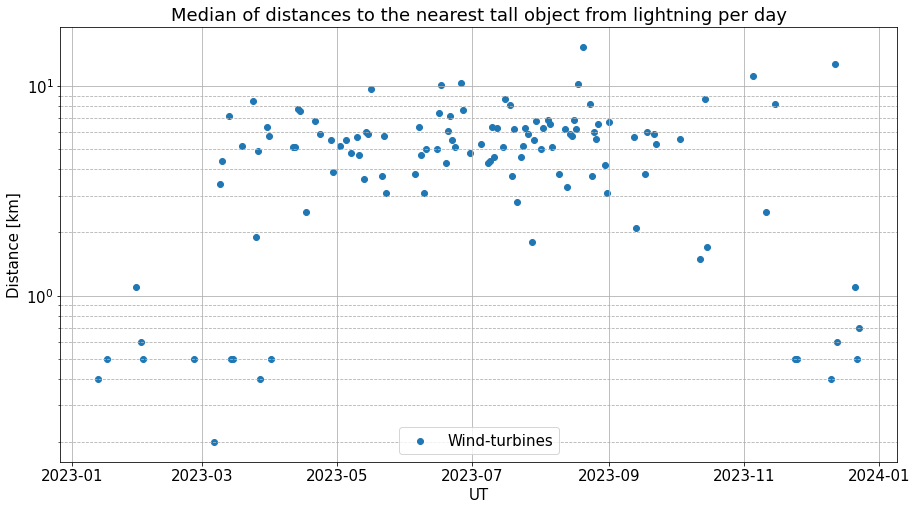

In [258]:
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 15})
plt.scatter(medians_wt['day'],medians_wt['median'], marker='o', label='Wind-turbines')
plt.ylabel('Distance [km]')
plt.xlabel('UT')
plt.title('Median of distances to the nearest tall object from lightning per day')
plt.legend(loc=8)
plt.yscale('log')
#plt.ylim(0,20)
#plt.xlim(pd.to_datetime('2023-01-01'),pd.to_datetime('2023-02-01'))
plt.grid(visible=True, which='major', linestyle='-')

plt.grid(visible=True, which='minor', linestyle='--')

In [169]:
# Frankfurt
sitename = 'Großen Feldberg/Frankfurt am Main'
lat=50.2399683
lon=8.4477547

BLITZ_DIST = 50


In [189]:
json_file = '/home/kakl/vanice/data/buildings.geojson'
#json_file = '/home/kakl/vanice/data/wt_frankfurt.geojson'

# Rekurzivní funkce pro získání prvního ne-pole prvku
def vyber_prvni_nevnoreny_prvek(hodnota):
    if isinstance(hodnota, list):
        # Pokud je první prvek listu další list, pokračujeme rekurzivně
        return vyber_prvni_nevnoreny_prvek(hodnota[0])
    else:
        # Vrátíme první prvek, který není list
        return hodnota

# Rekurzivní funkce pro nalezení posledního vnořeného pole
def najdi_posledni_vnorene_pole(pole):
    if not isinstance(pole, list) or not pole:
        return None
    if all(not isinstance(item, list) for item in pole):
        return pole  # Vrátí pole, pokud žádný prvek není další seznam
    for item in reversed(pole):
        if isinstance(item, list):
            return najdi_posledni_vnorene_pole(item)  # Rekurzivní hledání v posledním vnořeném seznamu

# Funkce pro získání druhého prvku z posledního vnořeného pole
def vyber_druhy_prvek_posledniho_vnoreneho_pole(hodnota):
    posledni_vnorene_pole = najdi_posledni_vnorene_pole(hodnota)
    if posledni_vnorene_pole and len(posledni_vnorene_pole) >= 2:
        return posledni_vnorene_pole[1]  # Vrátí druhý prvek, pokud je dostupný
    return None

# Funkce pro získání druhého prvku z posledního vnořeného pole
def vyber_prvni_prvek_posledniho_vnoreneho_pole(hodnota):
    posledni_vnorene_pole = najdi_posledni_vnorene_pole(hodnota)
    if posledni_vnorene_pole and len(posledni_vnorene_pole) >= 2:
        return posledni_vnorene_pole[0]  # Vrátí druhý prvek, pokud je dostupný
    return None


with open(json_file) as f:
    data = json.load(f)
buildings = pd.json_normalize(data,'features')

# Vytvoříme nový sloupec 'prvni_prvek' obsahující pouze první prvek z každého pole v 'sloupec_s_polem'
#buildings['coordinates'] =  buildings['geometry.coordinates'].apply(lambda x: x[0] if x else None)
#buildings['coordinates'] =  buildings['coordinates'].apply(lambda x: x[0] if x else None)
buildings['lon'] = buildings['geometry.coordinates'].apply(vyber_prvni_prvek_posledniho_vnoreneho_pole)
buildings['lat'] = buildings['geometry.coordinates'].apply(vyber_druhy_prvek_posledniho_vnoreneho_pole)


In [190]:
# Reduction of building points

buildings['lonRad']=np.radians(buildings.lon)
buildings['latRad']=np.radians(buildings.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
buildings['DlonRad']=lonRad-buildings.lonRad
buildings['DlatRad']=latRad-buildings.latRad
buildings['a']=np.sin(buildings.DlatRad/2.)**2. + np.cos(buildings.latRad) * np.cos(latRad) * np.sin(buildings.DlonRad/2.)**2.
buildings['km'] = 2. * np.arcsin(np.sqrt(buildings.a))*6378.
buildings = buildings.loc[buildings['km'] <= BLITZ_DIST]
buildings.reset_index(inplace=True)

buildings = buildings.drop_duplicates(subset='lon')

In [191]:
len(buildings)

64

In [8]:
# Load of lightning data

blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+str(start).split(' ')[0]+'.log', sep=',', low_memory=False, on_bad_lines='skip')


In [9]:
# Reduction of distant lightnings

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
blitz.reset_index(inplace=True)

In [15]:
start=pd.Timestamp('2023-1-1') 

for d in range(0,365):
    day = start + pd.Timedelta(days=d)
    file = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+file, sep=',', low_memory=False, on_bad_lines='skip')
    print(file)

    # Reduction of distant lightnings
    blitz['lonRad']=np.radians(blitz.lon)
    blitz['latRad']=np.radians(blitz.lat)
    lonRad=np.radians(lon)
    latRad=np.radians(lat)
    blitz['DlonRad']=lonRad-blitz.lonRad
    blitz['DlatRad']=latRad-blitz.latRad
    blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
    blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
    blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
    blitz.reset_index(inplace=True)

    if len(blitz)>0:
        # Identify lightning with nearby structures
        
        # Converting coordinates to radians
        blitz['latRad'] = np.radians(blitz['lat'])
        blitz['lonRad'] = np.radians(blitz['lon'])
        windturbines['latRad'] = np.radians(windturbines['lat'])
        windturbines['lonRad'] = np.radians(windturbines['lon'])

        # Converting pandas.Series to numpy.array
        latRad_blitz = blitz['latRad'].to_numpy()
        lonRad_blitz = blitz['lonRad'].to_numpy()
        latRad_windturbines = windturbines['latRad'].to_numpy()
        lonRad_windturbines = windturbines['lonRad'].to_numpy()
        latRad_buildings = buildings['latRad'].to_numpy()
        lonRad_buildings = buildings['lonRad'].to_numpy()

        # Calculating distance between each point in 'blitz' and all points in 'structures'
        distances_wt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_windturbines, lonRad_windturbines)
        blitz['wt'] = np.amin(distances_wt, axis=1)
        distances_bd = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_buildings, lonRad_buildings)
        blitz['bd'] = np.amin(distances_bd, axis=1)
        
        blitz.to_csv('./statistics_frankfurt/'+file, sep=',')
        
print('*************end')    

2023-01-01.log
2023-01-02.log
2023-01-03.log
2023-01-04.log
2023-01-05.log
2023-01-06.log
2023-01-07.log
2023-01-08.log
2023-01-09.log
2023-01-10.log
2023-01-11.log
2023-01-12.log
2023-01-13.log
2023-01-14.log
2023-01-15.log
2023-01-16.log
2023-01-17.log
2023-01-18.log
2023-01-19.log
2023-01-20.log
2023-01-21.log
2023-01-22.log
2023-01-23.log
2023-01-24.log
2023-01-25.log
2023-01-26.log
2023-01-27.log
2023-01-28.log
2023-01-29.log
2023-01-30.log
2023-01-31.log
2023-02-01.log
2023-02-02.log
2023-02-03.log
2023-02-04.log
2023-02-05.log
2023-02-06.log
2023-02-07.log
2023-02-08.log
2023-02-09.log
2023-02-10.log
2023-02-11.log
2023-02-12.log
2023-02-13.log
2023-02-14.log
2023-02-15.log
2023-02-16.log
2023-02-17.log
2023-02-18.log
2023-02-19.log
2023-02-20.log
2023-02-21.log
2023-02-22.log
2023-02-23.log
2023-02-24.log
2023-02-25.log
2023-02-26.log
2023-02-27.log
2023-02-28.log
2023-03-01.log
2023-03-02.log
2023-03-03.log
2023-03-04.log
2023-03-05.log
2023-03-06.log
2023-03-07.log
2023-03-08

In [41]:
start=pd.Timestamp('2023-1-1') 

medians_wt = pd.DataFrame(columns=['day', 'median'])
medians_bd = pd.DataFrame(columns=['day', 'median'])

for d in range(0,365):
    day = start + pd.Timedelta(days=d)
    file = '%02d-%02d-%02d.log' % (day.year, day.month, day.day)

    # Load of lightning data
    try:
        blitz = pd.read_csv('./statistics_frankfurt/'+file, sep=',', low_memory=False, on_bad_lines='skip')
        #print(file)
    
        #median_wt = round(statistics.median(blitz['wt']),1)
        median_wt = round(np.percentile(blitz['wt'],50),1)
        #median_bd = round(statistics.median(blitz['bd']),1)
        median_bd = round(np.percentile(blitz['bd'],50),1)
    except:
        median_wt = np.nan
        median_bd = np.nan

    median = pd.DataFrame(data= {'day':[day],'median':[median_wt]})
    medians_wt = pd.concat([medians_wt,median])
    median = pd.DataFrame(data= {'day':[day],'median':[median_bd]})
    medians_bd = pd.concat([medians_bd,median])

print('end')

end


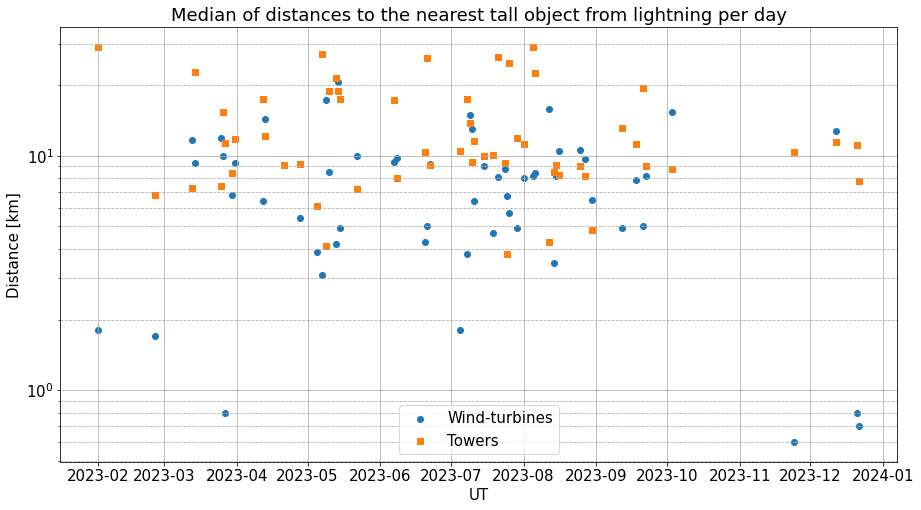

In [42]:
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 15})
plt.scatter(medians_wt['day'],medians_wt['median'], marker='o', label='Wind-turbines')
plt.scatter(medians_bd['day'],medians_bd['median'], marker='s', label='Towers')
plt.ylabel('Distance [km]')
plt.xlabel('UT')
plt.title('Median of distances to the nearest tall object from lightning per day')
plt.legend(loc=8)
plt.yscale('log')
#plt.ylim(0,20)
#plt.axes().yaxis.set_tick_params(which='minor', right = 'off')

plt.grid(visible=True, which='major', linestyle='-')
plt.grid(visible=True, which='minor', linestyle='--')

In [110]:
start=pd.Timestamp('2023-8-15') 

# Frankfurt
sitename = 'Großen Feldberg/Frankfurt am Main'
lat=50.2399683
lon=8.4477547

BLITZ_DIST = 50


In [111]:
# Load of lightning data

blitz = pd.read_csv('/storage/blitzortung/2023/region_18/'+str(start).split(' ')[0]+'.log', sep=',', low_memory=False, on_bad_lines='skip')


In [112]:
# Reduction of distant lightnings

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz = blitz.loc[blitz['km'] <= BLITZ_DIST]
blitz.reset_index(inplace=True)

In [113]:
# Identify lightning with nearby structures

# Converting coordinates to radians
blitz['latRad'] = np.radians(blitz['lat'])
blitz['lonRad'] = np.radians(blitz['lon'])
windturbines['latRad'] = np.radians(windturbines['lat'])
windturbines['lonRad'] = np.radians(windturbines['lon'])

# Converting pandas.Series to numpy.array
latRad_blitz = blitz['latRad'].to_numpy()
lonRad_blitz = blitz['lonRad'].to_numpy()
latRad_windturbines = windturbines['latRad'].to_numpy()
lonRad_windturbines = windturbines['lonRad'].to_numpy()

# Calculating distance between each point in 'blitz' and all points in 'structures'
distances_wt = vec_haversine(latRad_blitz[:, np.newaxis], lonRad_blitz[:, np.newaxis], latRad_windturbines, lonRad_windturbines)
#distances_wt2 = vec_haversine(latRad_windturbines[:, np.newaxis], lonRad_windturbines[:, np.newaxis], latRad_blitz, lonRad_blitz)

# Marking points in 'blitz' that are within 1.4 km of any point in 'structures'
#blitz['is_close'] = False
#blitz['is_close'] = np.any(distances_wt <= (radius_error), axis=1)
#windturbines['is_close'] = np.any(distances_wt2 <= (radius_error), axis=1)
#vetrniky = len(blitz.loc[blitz['is_close']==True])
#blitz['vetrnik'] = blitz['is_close']

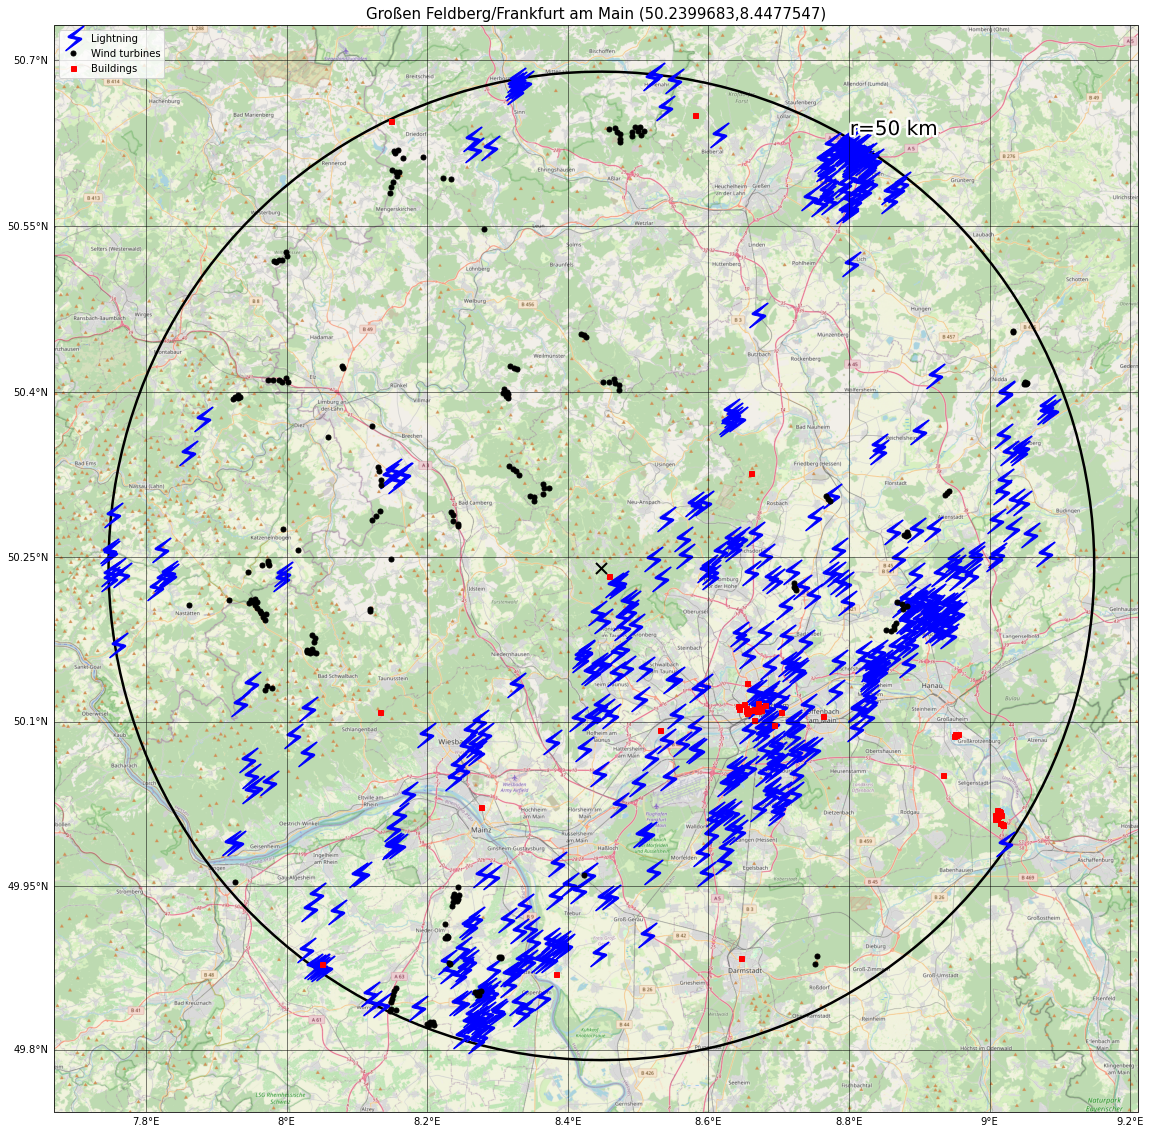

In [192]:
__title__   = 'Plot OpenStreetMap site map'
__version__ = 'v1.0 (2021-03-02)'
__author__  = 'Mathew Lipson'
__email__   = 'm.lipson@unsw.edu.au'

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import cartopy
import cartopy.geodesic as cgeo
import cartopy.crs as ccrs

import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
import shapely

projpath = '.'

##########################################################################

def main():

    RADIUS = BLITZ_DIST * 1000
    
    # style can be 'map' or 'satellite'

    #for style in ['map','satellite']:

    osm_image(lon, lat, sitename=sitename, style='map', radius=RADIUS)

    return

##########################################################################

def osm_image(lon,lat,sitename='Columbo',style='satellite',radius=500):
    '''This function makes OpenStreetMap satellite or map image with circle and random points.
    Change np.random.seed() number to produce different (reproducable) random patterns of points.
    Also review 'scale' variable'''

    if style=='map':
        ## MAP STYLE
        cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.OSM() # spoofed, downloaded street map
    elif style =='satellite':
        # SATELLITE STYLE
        cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.QuadtreeTiles() # spoofed, downloaded street map
    else:
        print('no valid style')

    stroke = [pe.Stroke(linewidth=1, foreground='w'), pe.Normal()]

    ############################################################################

    plt.close('all')
    fig = plt.figure(figsize=(20,20)) # open matplotlib figure
    ax = plt.axes(projection=img.crs) # project using coordinate reference system (CRS) of street map
    data_crs = ccrs.PlateCarree()

    ax.set_title(f'{sitename} ({lat},{lon})',fontsize=15)

    # auto-calculate scale
    #scale = int(120/np.log(radius))
    scale = int(115/np.log(radius))
    scale = (scale<20) and scale or 19

    scale = 11
    
    # or change scale manually
    # NOTE: scale specifications should be selected based on radius
    # but be careful not have both large scale (>16) and large radius (>1000), 
    #  it is forbidden under [OSM policies](https://operations.osmfoundation.org/policies/tiles/)
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    extent = calc_extent(lon,lat,radius*1.1)
    ax.set_extent(extent) # set extents
    ax.add_image(img, int(scale)) # add OSM with zoom specification

    # add site
    ax.plot(lon,lat, color='black', marker='x', ms=11, mew=2, transform=data_crs)
    
    lightning = blitz
    ax.plot(lightning.lon,lightning.lat,color='blue',lw=0,marker='$\u26A1$',ms=25,mew=1.0,transform=data_crs, label='Lightning')

    ax.plot(windturbines.lon,windturbines.lat,color='black',lw=0,marker='o',ms=5,mew=1.0,transform=data_crs, label='Wind turbines')

    ax.plot(buildings.lon,buildings.lat,color='red',lw=0,marker='s',ms=5,mew=1.0,transform=data_crs, label='Buildings')

    # add cartopy geodesic circle
    circle_points = cgeo.Geodesic().circle(lon=lon, lat=lat, radius=radius)
    geom = shapely.geometry.Polygon(circle_points)
    ax.add_geometries((geom,), crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=2.5)

    radius_text = cgeo.Geodesic().direct(points=(lon,lat),azimuths=30,distances=radius)[:,0:2][0]
    stroke = [pe.Stroke(linewidth=5, foreground='w'), pe.Normal()]
    ax.text(radius_text[0],radius_text[1],f'r={int(radius/1000)} km', color='black', 
        fontsize=20, ha='left',va='bottom', path_effects=stroke, transform=data_crs)

    gl = ax.gridlines(draw_labels=True, crs=data_crs,
                        color='k',lw=0.5)

    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    
    plt.legend(loc=2)

    plt.show()

    #fig.savefig(f'./pics/'+sitename+'_windturbines.png', dpi=150, bbox_inches='tight')

    return

def calc_extent(lon,lat,dist):
    '''This function calculates extent of map
    Inputs:
        lat,lon: location in degrees
        dist: dist to edge from centre
    '''

    dist_cnr = np.sqrt(2*dist**2)
    top_left = cgeo.Geodesic().direct(points=(lon,lat),azimuths=-45,distances=dist_cnr)[:,0:2][0]
    bot_right = cgeo.Geodesic().direct(points=(lon,lat),azimuths=135,distances=dist_cnr)[:,0:2][0]

    extent = [top_left[0], bot_right[0], bot_right[1], top_left[1]]

    return extent

def image_spoof(self, tile):
    '''this function reformats web requests from OSM for cartopy
    Heavily based on code by Joshua Hrisko at:
        https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy'''

    url = self._image_url(tile)                # get the url of the street map API
    req = Request(url)                         # start request
    req.add_header('User-agent','Anaconda 3')  # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read())            # get image
    fh.close()                                 # close url
    img = Image.open(im_data)                  # open image with PIL
    img = img.convert(self.desired_tile_form)  # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

if __name__ == "__main__":

   main()

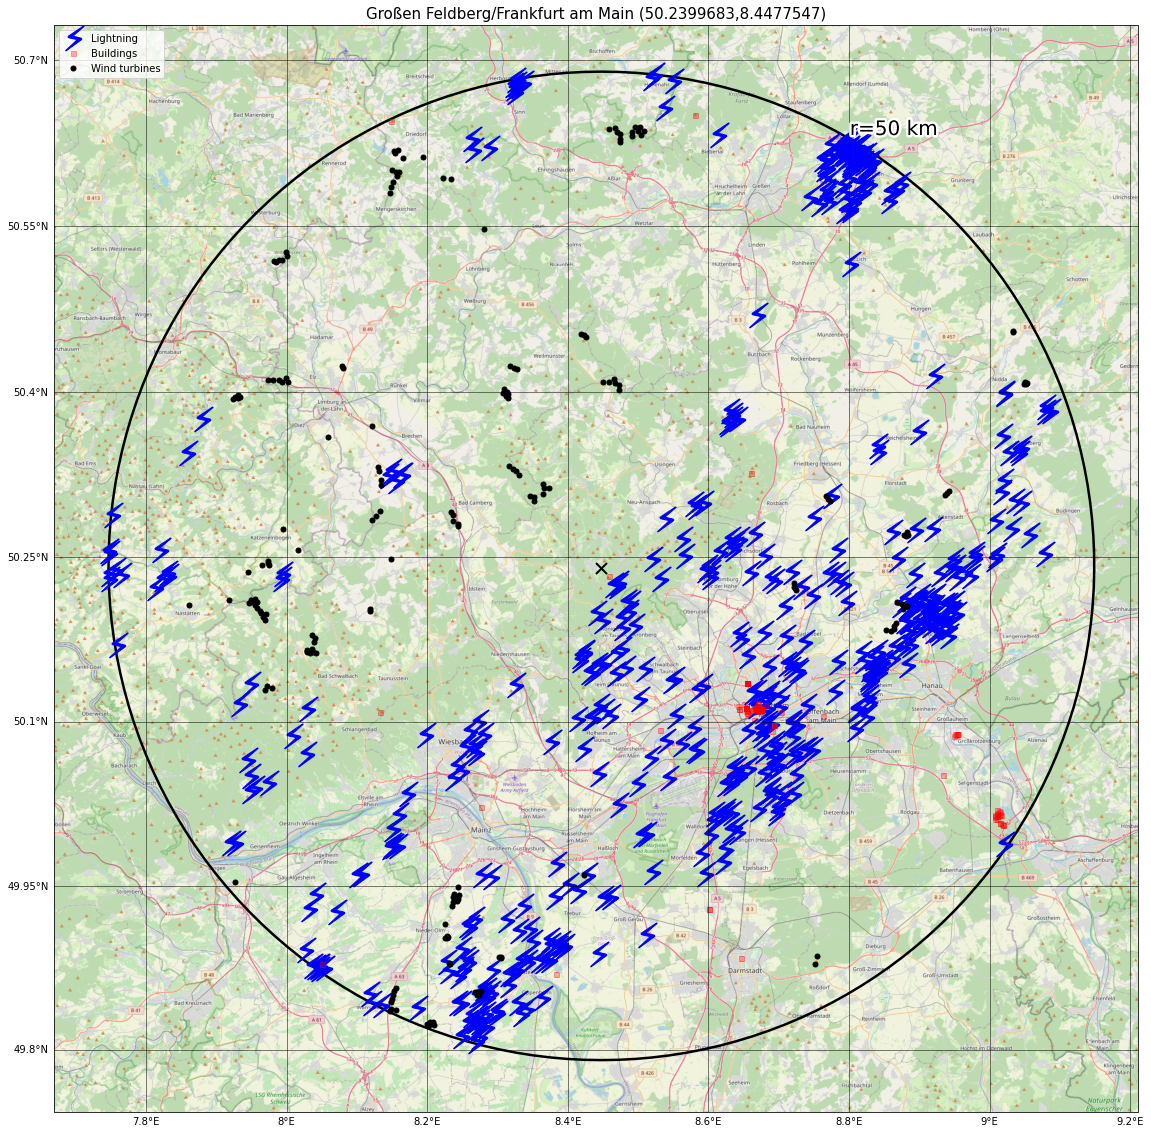

In [166]:
__title__   = 'Plot OpenStreetMap site map'
__version__ = 'v1.0 (2021-03-02)'
__author__  = 'Mathew Lipson'
__email__   = 'm.lipson@unsw.edu.au'

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import cartopy
import cartopy.geodesic as cgeo
import cartopy.crs as ccrs

import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
import shapely

projpath = '.'

##########################################################################

def main():

    RADIUS = BLITZ_DIST * 1000
    
    # style can be 'map' or 'satellite'

    #for style in ['map','satellite']:

    osm_image(lon, lat, sitename=sitename, style='map', radius=RADIUS)

    return

##########################################################################

def osm_image(lon,lat,sitename='Columbo',style='satellite',radius=500):
    '''This function makes OpenStreetMap satellite or map image with circle and random points.
    Change np.random.seed() number to produce different (reproducable) random patterns of points.
    Also review 'scale' variable'''

    if style=='map':
        ## MAP STYLE
        cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.OSM() # spoofed, downloaded street map
    elif style =='satellite':
        # SATELLITE STYLE
        cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.QuadtreeTiles() # spoofed, downloaded street map
    else:
        print('no valid style')

    stroke = [pe.Stroke(linewidth=1, foreground='w'), pe.Normal()]

    ############################################################################

    plt.close('all')
    fig = plt.figure(figsize=(20,20)) # open matplotlib figure
    ax = plt.axes(projection=img.crs) # project using coordinate reference system (CRS) of street map
    data_crs = ccrs.PlateCarree()

    ax.set_title(f'{sitename} ({lat},{lon})',fontsize=15)

    # auto-calculate scale
    #scale = int(120/np.log(radius))
    scale = int(115/np.log(radius))
    scale = (scale<20) and scale or 19

    scale = 11
    
    # or change scale manually
    # NOTE: scale specifications should be selected based on radius
    # but be careful not have both large scale (>16) and large radius (>1000), 
    #  it is forbidden under [OSM policies](https://operations.osmfoundation.org/policies/tiles/)
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    extent = calc_extent(lon,lat,radius*1.1)
    ax.set_extent(extent) # set extents
    ax.add_image(img, int(scale)) # add OSM with zoom specification

    # add site
    ax.plot(lon,lat, color='black', marker='x', ms=11, mew=2, transform=data_crs)
    
    lightning = blitz
    ax.plot(lightning.lon,lightning.lat,color='blue',lw=0,marker='$\u26A1$',ms=25,mew=1.0,transform=data_crs, label='Lightning')

    ax.plot(buildings.lon,buildings.lat,color='red',lw=0,marker='s',ms=5,mew=1.0,transform=data_crs, label='Buildings',alpha=0.3)

    ax.plot(windturbines.lon,windturbines.lat,color='black',lw=0,marker='o',ms=5,mew=1.0,transform=data_crs, label='Wind turbines')

    # add cartopy geodesic circle
    circle_points = cgeo.Geodesic().circle(lon=lon, lat=lat, radius=radius)
    geom = shapely.geometry.Polygon(circle_points)
    ax.add_geometries((geom,), crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=2.5)

    radius_text = cgeo.Geodesic().direct(points=(lon,lat),azimuths=30,distances=radius)[:,0:2][0]
    stroke = [pe.Stroke(linewidth=5, foreground='w'), pe.Normal()]
    ax.text(radius_text[0],radius_text[1],f'r={int(radius/1000)} km', color='black', 
        fontsize=20, ha='left',va='bottom', path_effects=stroke, transform=data_crs)

    gl = ax.gridlines(draw_labels=True, crs=data_crs,
                        color='k',lw=0.5)

    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    
    plt.legend(loc=2)

    plt.show()

    #fig.savefig(f'./pics/'+sitename+'_windturbines.png', dpi=150, bbox_inches='tight')

    return

def calc_extent(lon,lat,dist):
    '''This function calculates extent of map
    Inputs:
        lat,lon: location in degrees
        dist: dist to edge from centre
    '''

    dist_cnr = np.sqrt(2*dist**2)
    top_left = cgeo.Geodesic().direct(points=(lon,lat),azimuths=-45,distances=dist_cnr)[:,0:2][0]
    bot_right = cgeo.Geodesic().direct(points=(lon,lat),azimuths=135,distances=dist_cnr)[:,0:2][0]

    extent = [top_left[0], bot_right[0], bot_right[1], top_left[1]]

    return extent

def image_spoof(self, tile):
    '''this function reformats web requests from OSM for cartopy
    Heavily based on code by Joshua Hrisko at:
        https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy'''

    url = self._image_url(tile)                # get the url of the street map API
    req = Request(url)                         # start request
    req.add_header('User-agent','Anaconda 3')  # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read())            # get image
    fh.close()                                 # close url
    img = Image.open(im_data)                  # open image with PIL
    img = img.convert(self.desired_tile_form)  # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

if __name__ == "__main__":

   main()

In [ ]:
print(len(windturbines))
print(len(buildings))


In [188]:
pd.set_option('display.max_rows', None)
#print(buildings.loc[0:,['id','properties.height','geometry.coordinates','properties.man_made']])
#print(buildings.loc[0:,['properties.height','properties.man_made','properties.building']])

#buildings['latround'] = buildings['lat'].round(6)
#uildings['lonround'] = buildings['lon'].round(6)

# Odstraníme duplicitní řádky na základě sloupce 'zaokrouhlene'
len(buildings.drop_duplicates(subset='lon'))

xx = buildings.sort_values(by=['geometry.coordinates'])
print(xx.loc[0:,['id','properties.height','geometry.coordinates']])

#buildings


                   id properties.height     geometry.coordinates
0    relation/9358222               314  [8.6546403, 50.1353278]
110    way/1215964081               128  [8.6549453, 50.1076364]
3        way/11017114               130  [8.6550399, 50.1108928]
21       way/86762038               200   [8.6559407, 50.110146]
8        way/11527276               142  [8.6598532, 50.1103521]
72      way/302578484               108  [8.6600682, 50.3264786]
55      way/183069536               198  [8.6623603, 50.1105698]
16       way/33175111               109  [8.6644113, 50.1012646]
7        way/11527233               142  [8.6645221, 50.1115512]
44      way/174437752               186   [8.6664561, 50.112933]
43      way/174437751               186  [8.6664937, 50.1125219]
59      way/183076912               184  [8.6667075, 50.1126969]
6        way/11527118               170  [8.6667386, 50.1127276]
42      way/174437750               186   [8.667026, 50.1127487]
45      way/174461751    

In [176]:
buildings

index     type                 id     properties.@id properties.building  \
0        9  Feature   relation/9358222   relation/9358222                 NaN   
1       10  Feature   relation/9358224   relation/9358224                 NaN   
2       11  Feature   relation/9358226   relation/9358226                 NaN   
3       12  Feature       way/11017114       way/11017114          commercial   
4       13  Feature       way/11526498       way/11526498                 NaN   
5       14  Feature       way/11526963       way/11526963          commercial   
6       15  Feature       way/11527118       way/11527118          commercial   
7       16  Feature       way/11527233       way/11527233          commercial   
8       17  Feature       way/11527276       way/11527276              office   
9       18  Feature       way/11527403       way/11527403              office   
10      19  Feature       way/11527438       way/11527438          commercial   
11      20  Feature       way/11527497       way/11527497              office   
12      21  Feature       way/11527546       way/11527546              office   
13      22  Feature  relation/12552751  relation/12552751          commercial   
14      25  Feature       way/23916129       way/23916129              office   
15      28  Feature       way/31285250       way/31285250              office   
16      30  Feature       way/33175111       way/33175111          commercial   
17      41  Feature       way/41726564       way/41726564                 yes   
18      43  Feature       way/42927746       way/42927746              office   
19      58  Feature       way/72863293       way/72863293              office   
20      61  Feature       way/74730506       way/74730506                 NaN   
21      64  Feature       way/86762038       way/86762038          commercial   
22      80  Feature      way/117615942      way/117615942              office   
23      89  Feature      way/127956225      way/127956225                 NaN   
24      90  Feature      way/128203726      way/128203726                 NaN   
25      97  Feature      way/135512122      way/135512122                 NaN   
26      98  Feature      way/135512123      way/135512123                 NaN   
27      99  Feature      way/135512304      way/135512304                 NaN   
28     100  Feature      way/135512305      way/135512305                 NaN   
29     101  Feature      way/135512306      way/135512306                 NaN   
30     102  Feature      way/135512345      way/135512345                 NaN   
31     109  Feature      way/145477327      way/145477327                 yes   
32     110  Feature      way/145477328      way/145477328                 NaN   
33     111  Feature      way/145477372      way/145477372       cooling_tower   
34     112  Feature      way/145477373      way/145477373                 yes   
35     113  Feature      way/145850295      way/145850295                 NaN   
36     114  Feature      way/145850297      way/145850297                 yes   
37     115  Feature      way/145953527      way/145953527                 yes   
38     117  Feature      way/156432555      way/156432555              public   
39     122  Feature      way/160487052      way/160487052                 yes   
40     123  Feature      way/160487236      way/160487236                 yes   
41     134  Feature      way/174435268      way/174435268          commercial   
42     135  Feature      way/174437750      way/174437750                 NaN   
43     136  Feature      way/174437751      way/174437751                 NaN   
44     137  Feature      way/174437752      way/174437752                 NaN   
45     138  Feature      way/174461751      way/174461751                 NaN   
46     139  Feature      way/174461752      way/174461752                 NaN   
47     144  Feature      way/183060773      way/183060773                 NaN   
48     145  Feature      way/1830607